### Introduction:

This assignment consists of four parts:
1. Load the M2_Data.csv file to Github Repository.
2. Read the data set from Github repository and load it into a Pandas dataframe
3. Using Python skills, perform some basic exploratory data analysis (EDA) 
4. Construct at least two different linear regression models that predict net hourly electrical energy output based on the provided explanatory variables and evaluate them using K-fold cross validation. 

Load python libraries

In [3]:
# load python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression
# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

### Part2, Load data from github repository

Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [23]:
data = pd.read_csv("https://raw.githubusercontent.com/TTZUO/DAV-6150/master/M2_Data.csv")
# print the first five rows
data.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [25]:
# check the shape of the data set
data.shape

(9568, 5)

In [26]:
# check if the data set include null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
T     9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
EP    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


### Part3, EDA

For this part, firslty I use seanborn to do the distribution analysis for each explanatory variable

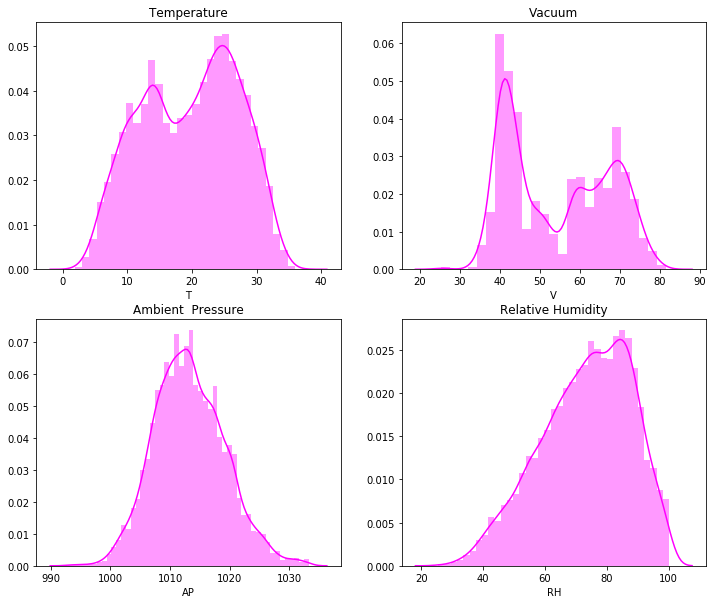

In [30]:
# use plt.figure to set the size of figure
plt.figure(figsize=(12,10))

# divides the current figure into an 2-by-2 grid and put the plot into first position
plt.subplot(221)
plt.title('Temperature')
# use seaborn to generate a histogram for variable Temperature(T)
sns.distplot(data['T'], color = 'magenta')

# put the plot into second position
plt.subplot(222)
plt.title('Vacuum')
# use seaborn to generate a histogram for variable Exhaust Vacuum(V)
sns.distplot(data['V'], color = 'magenta')

# put the plot into third position
plt.subplot(223)
plt.title('Ambient  Pressure')
# use seaborn to generate a histogram for variable Ambient Pressure(AP)
sns.distplot(data['AP'], color = 'magenta')

# put the plot into fourth position
plt.subplot(224)
plt.title('Relative Humidity')
# use seaborn to generate a histogram for variable Relative Humidity(RH)
sns.distplot(data['RH'], color = 'magenta')



From these four distribution plot, we can find that, Temperature and Exhaust Vacuum are bimodal distribution, Ambient Pressure is normal distribution, Relative Humidity is left skewed

Secondly, I use scatter plot to find the relationship between response variable and each explanatory variable

Text(0, 0.5, 'EP')

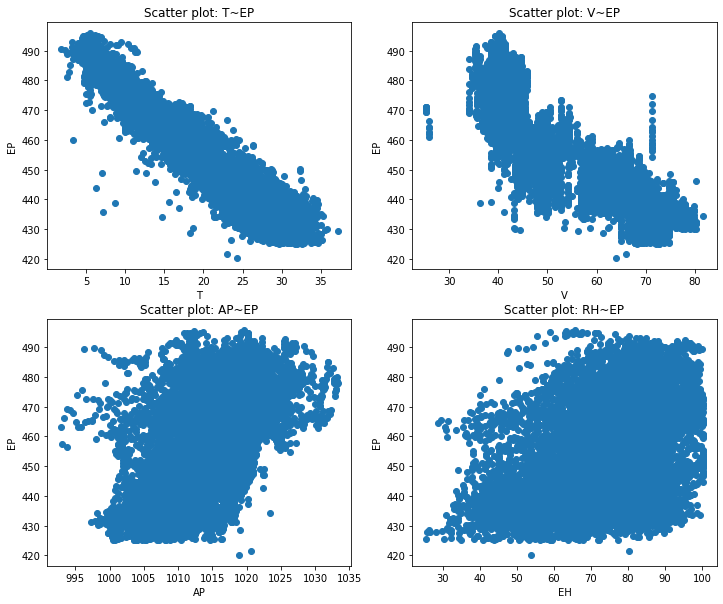

In [8]:
# use plt.figure to set the size of figure
plt.figure(figsize=(12,10))

# divides the current figure into an 2-by-2 grid and put the plot into first position
plt.subplot(221)
#generate a scatter for variable Temperature(T) and Net hourly electrical energy output (EP)
plt.scatter(data['T'],data['EP'])
plt.title('Scatter plot: T~EP')
plt.xlabel('T')
plt.ylabel('EP')

# put the plot into second position
plt.subplot(222)
#generate a scatter for variable Exhaust Vacuum(V) and Net hourly electrical energy output (EP)
plt.scatter(data['V'],data['EP'])
plt.title('Scatter plot: V~EP')
plt.xlabel('V')
plt.ylabel('EP')

# put the plot into third position
plt.subplot(223)
#generate a scatter for variable Ambient Pressure(AP) and Net hourly electrical energy output (EP)
plt.scatter(data['AP'],data['EP'])
plt.title('Scatter plot: AP~EP')
plt.xlabel('AP')
plt.ylabel('EP')

plt.subplot(224)
#generate a scatter for variable Relative Humidity(RH) and Net hourly electrical energy output (EP)
plt.scatter(data['RH'],data['EP'])
plt.title('Scatter plot: RH~EP')
plt.xlabel('EH')
plt.ylabel('EP')

From these scatter plot, we can find that, while Temperature(T) increase, EP decrease, while Exhaust Vacuum(V) increase, EP also decrease, so they have strong negative relationship, while AP and EH inrease, EP seems have a little increase, so they have a weak relationship wirh EP

Thirdly, I create a heatmap to find the coefficient between response variable and explanatory variables

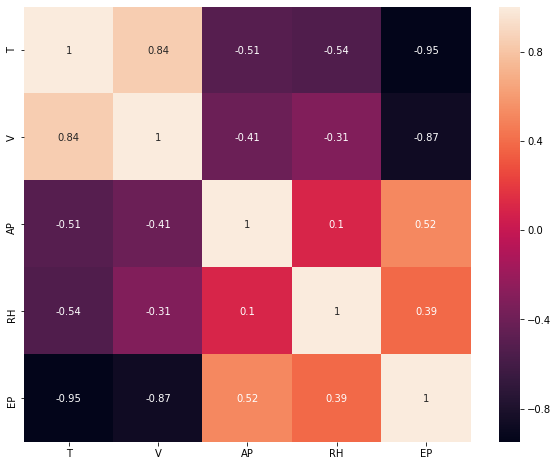

In [9]:
# set figure size
plt.figure(figsize=(10,8))
# give corr value to co
co = data.corr()
# use seaborn to generate heatmap
sns.heatmap(co, annot=True)

From the heatmap, we can find that the coefficient of T and EP is -0.95, V and EP is -0.85, so I would like to use these two variables as my features, also the coefficient of T ad RH is -0.54, so I also consider it as my predict feature


### Part4, for this part, I will use train_test_split to split the training and testing subsets and implement the k-fold cross validation to construct 4 Regression Model and find the highest average accuracy scores

In [10]:
# give response variable to X
X = data[['T', 'AP', 'RH', 'V']]
# give explanatory variable to y
y = data['EP']
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [35]:
# show first five rows of X_train
X_train.head()

,T,AP,RH,V
1090,12.57,1019.57,72.44,39.30
6137,25.27,1015.21,79.33,69.89
4703,12.57,1009.11,70.74,41.66
1901,13.80,1012.37,83.69,39.82
3704,18.80,1005.86,76.77,47.83


Using following features to construct four linear regression model:
1. all features, because T and V have strong relationship, AP and RH also have weak relationship with EP
2. T and V, because they have strong relationship with EP
3. T and AP, because T has highest coefficient, AP has medium coefficient with T
4. T and RH, because T has highest coefficient, RH has higher coefficient with T than AP

In [36]:
# Define a linear regression model
model = LinearRegression()
# fit the model using 5-fold cross validation with all features
scores = cross_val_score(model, X_train, y_train, cv=5)
print("All features")
print(scores)
# use np.mean to get the average scores
print("mean socre:",np.mean(scores))
print()

# Define a linear regression model
model = LinearRegression()
# create new datafram X and fet T and V values from X_train
X = X_train[['T', 'V']]
# fit the model using 5-fold cross validation with variables T and V
scores = cross_val_score(model, X, y_train, cv=5)
print("T ~ V")
print(scores)
# use np.mean to get the average scores
print("mean socre:",np.mean(scores))
print()

# Define a linear regression model
model = LinearRegression()
# create new datafram X and fet T and AP values from X_train
X = X_train[['T', 'AP']]
# fit the model using 5-fold cross validation with variables T and AP
scores = cross_val_score(model, X, y_train, cv=5)
print("T ~ AP")
print(scores)
print("mean socre:",np.mean(scores))
print()

# Define a linear regression model
model = LinearRegression()
# create new datafram X and fet T and RH values from X_train
X = X_train[['T', 'RH']]
# fit the model using 5-fold cross validation with variables T and RH
scores = cross_val_score(model, X, y_train, cv=5)
print("T ~ RH")
print(scores)
# create new datafram X and fet T and V values from X_train
print("mean socre:",np.mean(scores))
print()


All features
[0.92483504 0.92716067 0.92960552 0.93214917 0.92427678]
mean socre: 0.9276054360920087

T ~ V
[0.91014846 0.91535804 0.91601249 0.91769219 0.91494075]
mean socre: 0.9148303865957537

T ~ AP
[0.89683896 0.89913423 0.90049792 0.90703056 0.89571191]
mean socre: 0.8998427162794774

T ~ RH
[0.91798847 0.9179039  0.92218032 0.92673241 0.91304296]
mean socre: 0.9195696117971242



Conclusion: From these four models, use all features would have the highest average score, the second highest is T and RH, and the lowest average socre is T and AP, so I prefer to use all features model in this case